<table style="background-color:#F5F5F5;" width="100%">
<tr><td style="background-color:#F5F5F5;">    <tr><td>
            <h2><center>Aprendizagem Automática em Engenharia Biomédica</center></h2>
            <h3><center>1st Semester - 2024/2025</center></h3>
            <h4><center>Universidade Nova de Lisboa - Faculdade de Ciências e Tecnologia</center></h4>
</td></tr>
    <tr><td><h2><b><center>Project</center></b></h2>
    <h4><i><b><center>Predicting Cervical Cancer: A Machine Learning Approach Using Risk Factor Analysis 
</center></b></i></h4></td></tr>
</table>


 <h3>Requesitos nos  modelos </h3>
 <li> Comparison of at least 3 models</li>
 <li>Cross-Validation</li>
 <li> Grid Search </li>
 <li> Results evaluation and discussion </li>


<h3>Avaliação </h3>

 <li> Quality of coding (temos de tipo comentar e explicar tudo)</li>
 <li>Creativity</li>
 <li> Comparison with the state of the Art </li>



<h3>1. Introduction</h3>

Cervical cancer is the fourth most common cancer worldwide and a significant cause of mortality, particularly in low- and middle-income countries, where 94% of all deaths occur [1]. Although medicine has evolved, implementing cytology-based and other types of screening remains challenging in these countries due to the lack of healthcare infrastructure and trained professionals [2]. 
With that in mind, machine learning can be used as a helpful system for interpreting complex datasets and support clinical decision-making due to its strong data analysis capabilities [3].

In clinical cases, the most common ways to detect this type of cancer include **the Cytology method, the biopsy, the Hinselmann test, and the Schiller test**. **The Cytology method** involves a microscopic analysis of tissue collected from the cervix to identify cell growth and its intensity. **The biopsy** is a surgical diagnostic procedure that involves collecting living tissue samples to determine if the sample is malignant or benign. **The Hinselmann test** is a visual inspection of the cervix using an iodine solution. However, the results of this test can vary depending on the examiner's expertise. **The Schiller test**, on the other hand, involves administering Lugol’s iodine for visual inspection of suspicious areas on the cervix. To reduce the high mortality rate of cervical cancer, it is crucial for women over 30 years of age to undergo regular screening tests every 3–5 years. In underdeveloped countries, however, frequent screening has been challenging due to limited medical infrastructure and expertise. Thus, we saw an opportunity for a biomedical solution that could renovate this practice and make it more accesible.


Altough the initial approach was to use machine learning characteristics' combined with the risk factors, in order to predict the presence of the cancer, upon analyzing the data and being more familiarized with the problem itself , it occured to us we could rewire the project to predict the results of the main four tests used to detect cervical cancer (Hinselmann, Schille, Citology and Biopsy). This work could be relevant for the management of clinical resources. For example, a person exhibiting certain risk factors could be called in to undergo only two of the four exams, saving both financial and material resource. 

Nevertheless, in order to fulfill the initial approach, we decided to use a model to predict 

 <h3>2. Data Preparation </h3>

The data preparation phase is a critical step in the development of any machine learning model. This phase involves transforming raw data into a clean, organized, and usable format, ensuring it is suitable for analysis and modeling. The primary goal of data preparation is to address inconsistencies, fill in missing values, and convert data into a format that aligns with the requirements of machine learning algorithms.

<h4> 2.1 Data import </h4>

In [1734]:
#!pip install ucimlrepo
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
from typing import Tuple
from sklearn.model_selection import train_test_split
import statistics

In [1736]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cervical_cancer_risk_factors = fetch_ucirepo(id=383) 
  
# data (as pandas dataframes) 
df_cervical_cancer = cervical_cancer_risk_factors.data.features 

#Getting dataset dimensions
n_rows = df_cervical_cancer.shape[0]
n_features = df_cervical_cancer.shape[1]
print('The dataset has {} samples and {} features. \n'.format(n_rows, n_features))

#Showing the first 10 rows of the dataset
print('The first 10 rows are displayed below. \n\n')
df_cervical_cancer.head(10)


The dataset has 858 samples and 36 features. 

The first 10 rows are displayed below. 




,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,...,NaN,NaN,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,...,NaN,NaN,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.8,0.0,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


<h5> 2.1.1 Data types </h5>
<p style="font-size:15px;"> The data is divided in integer values such as age and number of diagnosis, floats, like the age at which the patient had its first sexual intercourse and a binary classification (0 as false and 1 as true) to evaluate the results of the tests, presence of STD's etc. </p>

In [1738]:
print(df_cervical_cancer.dtypes)

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [1739]:
#Get all the columns with a binary classification 
binary_columns = df_cervical_cancer.loc[:, (df_cervical_cancer.isin([0, 1]) | df_cervical_cancer.isna()).all()]
binary_columns.describe().iloc[[0]]

,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,...,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,845.0,750.0,741.0,753.0,753.0,753.0,753.0,753.0,753.0,753.0,...,753.0,753.0,858.0,858.0,858.0,858.0,858.0,858.0,858.0,858.0


In [1740]:
#Get the columns with continuos values
continuous_columns = df_cervical_cancer.drop(binary_columns.columns, axis=1)
continuous_columns.describe().iloc[[1,2,3,7]]


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis
mean,26.820513,2.527644,16.995300,2.275561,1.219721,0.453144,2.256419,0.514804,0.176627,0.087413,6.140845,5.816901
std,8.497948,1.667760,2.803355,1.447414,4.089017,2.226610,3.764254,1.943089,0.561993,0.302545,5.895024,5.755271
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,3.000000,22.000000,22.000000


In [1741]:
df_cervical_cancer.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

<p style="font-size:15px;"> The columns 'STDs: Time since first diagnosis' and 'STDs: Time since last diagnosis' have a lot of missing values ​​so we will not use them.</p>

In [1743]:
df_cervical_cancer= df_cervical_cancer.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'], axis=1)


In [1744]:
zero_per_columns = (df_cervical_cancer == 0).sum()
print(zero_per_columns)

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                     16
Smokes                                722
Smokes (years)                        722
Smokes (packs/year)                   722
Hormonal Contraceptives               269
Hormonal Contraceptives (years)       269
IUD                                   658
IUD (years)                           658
STDs                                  674
STDs (number)                         674
STDs:condylomatosis                   709
STDs:cervical condylomatosis          753
STDs:vaginal condylomatosis           749
STDs:vulvo-perineal condylomatosis    710
STDs:syphilis                         735
STDs:pelvic inflammatory disease      752
STDs:genital herpes                   752
STDs:molluscum contagiosum            752
STDs:AIDS                             753
STDs:HIV                              735
STDs:Hepatitis B                  

<p style="font-size:15px;">The STDs:AIDS and STDs:cervical condylomatosis columns have all values ​​equal to 0, so we will not use them either.  </p>

In [1746]:
df_cervical_cancer= df_cervical_cancer.drop(['STDs:AIDS','STDs:cervical condylomatosis'], axis=1)

In [1747]:
df_cervical_cancer.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis         

<p style="font-size:15px;"> As we can see, there are several variables with missing values, so in columns with demographic values, such as 'Number of sexual partners', 'Number of pregnancies' and 'Hormonal contraceptives', these will be replaced by the column average.  </p> (artigo)


In [1749]:
list_nonbinary = ['Number of sexual partners', 'First sexual intercourse' ,'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)','IUD (years)'] 
list_binary = ['Smokes','Hormonal Contraceptives', 'IUD']

for col in list_nonbinary:
    mean = df_cervical_cancer[col].mean()
    df_cervical_cancer[col] = df_cervical_cancer[col].fillna(mean)
    
for col in list_binary:
    mean = df_cervical_cancer[col].mean()
    df_cervical_cancer[col] = df_cervical_cancer[col].fillna(round(mean))
    
df_cervical_cancer.isnull().sum()


Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)         0
IUD                                     0
IUD (years)                             0
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis         

<p style="font-size:15px;"> Agora vamos tirar os outros que têm NaN  </p> 


In [1751]:
df_cervical_cancer.dropna(inplace = True)
print(df_cervical_cancer.shape[0])

753


In [1752]:
targets = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
X = df_cervical_cancer.drop(targets,axis=1)
Y = df_cervical_cancer[targets]

<p style="font-size:15px;"> Analysis of data imbalance:  </p> 

The proportion of positive for each target variable, in percentage, is: 

Hinselmann     4.874652
Schiller      10.735294
Citology       5.758427
Biopsy         7.571429
dtype: float64


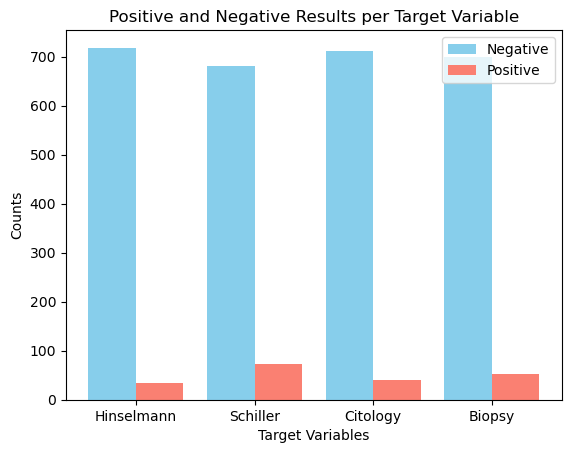

In [1754]:
target_variables = Y

negative_per_target = (target_variables == 0).sum()

positive_per_target = (target_variables == 1).sum()

proportion = (positive_per_target/negative_per_target)*100

print('The proportion of positive for each target variable, in percentage, is: \n\n{}'.format(proportion))

# Plotting
x = np.arange(len(targets))  # Positions for the bars
width = 0.4  # Width of each bar

plt.bar(x - width/2, negative_per_target, width, label='Negative', color='skyblue')
plt.bar(x + width/2, positive_per_target, width, label='Positive', color='salmon')

# Adding labels and title
plt.xlabel('Target Variables')
plt.ylabel('Counts')
plt.title('Positive and Negative Results per Target Variable')
plt.xticks(x, targets)
plt.legend()


<p style="font-size:15px;">Through this analysis we concluded that the data is unbalanced, so we will use the SMOTE technique to balance the data. </p> 

In [1756]:
data_splitting = {}

for col in Y:
    X_train, X_test, y_train, y_test = train_test_split(X, Y[col], test_size=0.3, random_state=42)
    data_splitting[Y[col].name] =[X_train, y_train,X_test, y_test]



vamos analisar a correlação só para 1 porque é igual para os 4

In [1758]:
split = data_splitting['Hinselmann']
X_train = split[0]

df_corr = X_train.corr()

threshold = 0.6
df_corr_filtered = df_corr[df_corr > threshold]

pairs = []
for i in range(len(df_corr_filtered.columns)):
    for j in range(i):
        if df_corr_filtered.iloc[i, j] > threshold and i!=j:
            pairs.append((df_corr_filtered.columns[i], df_corr_filtered.columns[j], df_corr_filtered.iloc[i, j]))

# Show the pairs and their correlation values
for pair in pairs:
    print(f"Features: {pair[0]} and {pair[1]} have a correlation of {pair[2]:.2f}")


Features: Smokes (years) and Smokes have a correlation of 0.72
Features: Smokes (packs/year) and Smokes (years) have a correlation of 0.75
Features: IUD (years) and IUD have a correlation of 0.73
Features: STDs (number) and STDs have a correlation of 0.93
Features: STDs:condylomatosis and STDs have a correlation of 0.75
Features: STDs:condylomatosis and STDs (number) have a correlation of 0.92
Features: STDs:vulvo-perineal condylomatosis and STDs have a correlation of 0.75
Features: STDs:vulvo-perineal condylomatosis and STDs (number) have a correlation of 0.92
Features: STDs:vulvo-perineal condylomatosis and STDs:condylomatosis have a correlation of 1.00
Features: STDs: Number of diagnosis and STDs have a correlation of 0.95
Features: STDs: Number of diagnosis and STDs (number) have a correlation of 0.91
Features: STDs: Number of diagnosis and STDs:condylomatosis have a correlation of 0.76
Features: STDs: Number of diagnosis and STDs:vulvo-perineal condylomatosis have a correlation of

In [1759]:
def get_correlated_features(correlation_matrix: pd.DataFrame, threshold: float = 0.6) -> list[str]:
    """
    Identifies features in a correlation matrix that have a correlation coefficient above a specified threshold.
    Returns a list of feature names that are highly correlated and may be redundant.

    :param correlation_matrix: pd.DataFrame
        The correlation matrix of the dataset, with feature names as both columns and index.
    :param threshold: float, optional
        The correlation threshold above which features are considered highly correlated.
        Default is 0.95.
        
    :return: List[str]
        A list of feature names that have high correlations above the specified threshold.
    """
    # Take the absolute value of the correlation matrix for consistency
    abs_corr_matrix = correlation_matrix.abs()
    
    # Select the upper triangle of the correlation matrix to avoid duplicate pairs
    upper_triangle = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(bool))
    
    # Identify features with any correlation higher than the threshold
    correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    
    return correlated_features

In [1760]:
corr_column = get_correlated_features(df_corr_filtered, threshold= 0.6)
print(len(corr_column))

9


In [1761]:
# Iterate through data_splitting to remove correlated features
for target, splits in data_splitting.items():
    X_train, y_train, X_test, y_test = splits

    # Compute the correlation matrix for X_train
    df_corr = X_train.corr()

    # Get the list of correlated columns
    correlated_columns = get_correlated_features(df_corr, threshold)

    # Drop the correlated columns from X_train and X_test
    X_train_dropped = X_train.drop(columns=correlated_columns)
    X_test_dropped = X_test.drop(columns=correlated_columns)

    # Update the dictionary with the modified data
    data_splitting[target] = [X_train_dropped, y_train, X_test_dropped, y_test]

# Print the updated column information for confirmation
for target, splits in data_splitting.items():
    print(f"\nTarget Variable: {target}")
    print(f"X_train columns after removing correlated features: {splits[0].shape[1]}")
    print(f"X_test columns after removing correlated features: {splits[2].shape[1]}")


Target Variable: Hinselmann
X_train columns after removing correlated features: 19
X_test columns after removing correlated features: 19

Target Variable: Schiller
X_train columns after removing correlated features: 19
X_test columns after removing correlated features: 19

Target Variable: Citology
X_train columns after removing correlated features: 19
X_test columns after removing correlated features: 19

Target Variable: Biopsy
X_train columns after removing correlated features: 19
X_test columns after removing correlated features: 19


In [1762]:
from imblearn.over_sampling import SMOTE
from collections import Counter

data_oversampled= {}

# Oversampling the train dataset using SMOTE
smt = SMOTE()
for name in data_splitting.keys():
    splits = data_splitting[name]
    
    X_train = splits[0]
    y_train = splits[1]
    X_test = splits[2]
    y_test = splits[3]
    
    counter = Counter(y_train)
    print('{} variable Before {}'.format(name, counter))
    
    X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
    
    counter = Counter(y_train_sm)
    print('{} variable After {}'.format(name, counter))
    
    data_oversampled[name] = [X_train_sm, y_train_sm, X_test, y_test]



Hinselmann variable Before Counter({0: 504, 1: 23})
Hinselmann variable After Counter({0: 504, 1: 504})
Schiller variable Before Counter({0: 479, 1: 48})
Schiller variable After Counter({0: 479, 1: 479})
Citology variable Before Counter({0: 498, 1: 29})
Citology variable After Counter({0: 498, 1: 498})
Biopsy variable Before Counter({0: 495, 1: 32})
Biopsy variable After Counter({0: 495, 1: 495})


In [1763]:
from sklearn.preprocessing import MinMaxScaler
# Criar o MinMaxScaler
min_max_scaler = MinMaxScaler()

# Função para aplicar Min-Max Scaling e criar um novo dicionário
def scaler(data_dict):
    """
    Aplica Min-Max Scaling aos conjuntos de treino e teste e cria um novo dicionário com os dados escalados.

    Args:
        data_key (str): Chave para aceder aos dados no dicionário.
        data_dict (dict): Dicionário contendo os conjuntos de treino e teste.

    Returns:
        dict: Um novo dicionário com os conjuntos escalados para treino e teste.
    """
    scaled_data = {}
    # Aceder aos conjuntos de treino e teste no dicionário
    for data_key in data_dict.keys():
        X_train = data_dict[data_key][0]  # Primeiro elemento
        y_train = data_dict[data_key][1]  # Segundo elemento
        X_test = data_dict[data_key][2]   # Terceiro elemento
        y_test = data_dict[data_key][3]   # Quarto elemento

    # Aplicar Min-Max Scaling aos conjuntos de treino e teste
        X_train_minmax = min_max_scaler.fit_transform(X_train)
        X_test_minmax = min_max_scaler.transform(X_test)

    # Converter para DataFrame para manter as colunas originais
        X_train_minmax = pd.DataFrame(X_train_minmax, columns=X_train.columns)
        X_test_minmax = pd.DataFrame(X_test_minmax, columns=X_test.columns)

    # Criar um novo dicionário com os dados escalados
        scaled_data[data_key] = [X_train_minmax, y_train, X_test_minmax, y_test]

    return scaled_data


In [1764]:
data_scaled = scaler(data_oversampled)

 <h3>3. Model Training </h3>

In [1766]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from tqdm import tqdm 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import StratifiedKFold

<p style="font-size:15px;">The calculate_metrics function will calculate metrics such as Train Accuracy, Test Accuracy, Precision, Recall, F1 Score, Specificity and Area under ROC curve. It will also generate predictions and provide a visual representation of model performance through a ROC curve.</p>

In [1768]:
def calculate_metrics(model_name, model_instance, X_train, y_train, X_test, y_test):
    """
    Calculate evaluation metrics for a trained model.

    :param model_name: Name of the model (e.g., "Random Forest").
    :param model_instance: The trained model instance.
    :param X_train: Training features as a numpy array.
    :param y_train: Training labels for a single target variable.
    :param X_test: Test features as a numpy array.
    :param y_test: Test labels for a single target variable.
    :return: A dictionary containing evaluation metrics and predictions.
    """
    
    train_acc = model_instance.score(X_train, y_train)
    test_acc = model_instance.score(X_test, y_test)
    y_test_pred = model_instance.predict(X_test)
    y_train_pred = model_instance.predict(X_train)
        

    if model_name == 'SVC':
        y_scores = model_instance.decision_function(X_test)
    else:
        y_scores = model_instance.predict_proba(X_test)[:,1]

    metrics = {
        "Model Name" : model_name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "Specificity": recall_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred),
        "Area under ROC curve": roc_auc_score(y_test, y_scores),
    }
    # Plot ROC curve
    RocCurveDisplay.from_predictions(y_test, y_scores)

    return metrics

<p style="font-size:15px;">The train_and_evaluate_multi_models function trains and evaluates multiple machine learning models against a single target variable. The function compares the performances of different provided models and returns their evaluation metrics and trained instances.</p>

In [1770]:
def train_and_evaluate_multi_models(Target : str, models: dict[str, any]) -> dict[str, dict[pd.DataFrame, any]]:
    """
    Train and evaluate multiple machine learning models for a single target variable.

    This function trains and evaluates each model in the provided dictionary for the
    given target variable in Y_train and Y_test.
    :param Target: a string containning one of the four target variables ('Hinselmann', 'Schiller', etc.)
    :param models: A dictionary where keys are model names and values are model instances.
    :param calculate_metrics_function: Function to calculate performance metrics for a model.
    :return: A dictionary associating model names to their metrics and instances.
    """
    results = {}

    for model_name, model_instance in models.items():
        if model_name == 'Random Forest': 
            splits = data_oversampled[Target]
            
        else: 
            splits = data_scaled[Target]
        X_train, y_train, X_test, y_test = splits

        # Train the model
        model_instance.fit(X_train, y_train)

        # Calculate metrics
        metrics = calculate_metrics(model_name, model_instance, X_train, y_train, X_test, y_test)
        metrics_df = pd.DataFrame(metrics, index = [0])      
        metrics_df.set_index('Model Name')

        # Store metrics and model instance in results
        results[model_name] = {"metrics": metrics_df, "instance":model_instance}

    return results

<p style="font-size:15px;">The confusion_matrix_visual function generates and allows the visualization of the confusion matrices for multiple machine learning models applied to a single target variable (Target).</p>

In [1772]:
def confusion_matrix_visual(Target:str, models: dict[str, dict[str, any]]):
    """
    Generate and visualize confusion matrices for multiple target variables.

    :param models: Dictionary where keys are target names and values are dictionaries containing 
                   'metrics' (model's metrics dictionary) and 'instance' (trained model object).
    """
    
    num_models = len(models)
    rows = (num_models + 1) // 2  # Number of rows in the subplot grid

    fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    for i, (model_name, values) in enumerate(models.items()):
        if model_name == 'Random Forest': 
            splits = data_oversampled[Target]
        else: 
            splits = data_scaled[Target]
            
        X_test = splits[2]
        Y_test = splits[3]
            
        metrics = values['metrics']  # Metrics (if needed in the future)
        best_model = values['instance']

        y_true = Y_test
        y_pred = best_model.predict(X_test)

        # Generate confusion matrix
        cm = confusion_matrix(y_true, y_pred, labels=best_model.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

        # Plot confusion matrix on the respective subplot
        disp.plot(ax=axes[i], cmap='Blues')
        axes[i].set_title('Confusion matrix for target: {}'.format(model_name))

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()  # Adjust layout for better visualization
    plt.show()

In [1773]:
def grid_search(models, param_grids, target):
    """
    Perform hyperparameter tuning with early stopping and plot accuracy changes.

    Parameters:
        models (dict): Dictionary of model names and their instances (e.g., RandomForestClassifier()).
        param_grids (dict): Dictionary of parameter grids for each model.
        X, y: Features and labels.
        patience (int): Number of consecutive rounds without improvement before stopping.
        scoring (str): Scoring metric for validation.

    Returns:
        best_model: The model with the best hyperparameters.
        best_params: The hyperparameters of the best model.
        history: Training history for each model (validation scores).
    """
    history = {}
    best_score = float('-inf')  # Initialize best score
    for model_name, training in models.items():
        model_instance = training['instance']
        
            # Select data based on model type
        if model_name == 'Random Forest':
            splits = data_oversampled[target]
        else:
            splits = data_scaled[target]
        
        X_train, y_train, X_test, y_test = splits

        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(model_instance, param_grid, cv=15, scoring = 'recall', return_train_score=True)
        grid_search.fit(X_train, y_train)

        # Get validation scores
        val_scores = grid_search.cv_results_["mean_test_score"]

        # Track history
        history = {"model name": model_name,"val_scores": val_scores, "params": grid_search.cv_results_["params"]}

        # Determine best model and params
        max_val_score = max(val_scores)
            
        best_score = max_val_score
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
                
        metrics_grid_search = calculate_metrics(model_name, best_model, X_train, y_train, X_test, y_test)
        metrics_grid_search["Best Parameters"] = best_params
        metrics_grid_search["Best Score"] = max_val_score

        metrics_grid_search = pd.DataFrame(metrics_grid_search, index = [0])
        metrics_grid_search.set_index('Model Name')

        training['Grid search metrics'] = metrics_grid_search
        training['Best model grid'] = best_model
        training['Grid Search F1 History'] = history 

        print(f"Best {model_name} validation score: {max_val_score:.4f}")
    
    return  models


<p style="font-size:15px;"> EXPLICA </p>

In [1775]:
def plot_hyperparameter_accuracies(history):
    """
    Plot the validation accuracy changes for each model during hyperparameter tuning.

    Parameters:
        history (dict): Validation scores and hyperparameters for each model.

    Returns:
        None: Displays the plot.
    """
    plt.figure(figsize=(12, 8))
    val_scores = history["val_scores"]
    plt.plot(val_scores, label=f"{history['model name']} Validation Accuracy")

    plt.xlabel("Hyperparameter Combinations (Arbitrary Order)")
    plt.ylabel("Validation Accuracy")
    plt.title("Validation Accuracy Changes During Hyperparameter Tuning")
    plt.legend()
    plt.show()

In [1853]:
def display_metrics_and_plots(results: dict[str, dict[pd.DataFrame, any]], Target: str):
    """
    Display metrics and ROC curves for multiple models in a visually appealing manner.

    :param results: Dictionary containing model names as keys and their metrics and instances as values.
    :param Target: The name of the target variable (e.g., 'Hinselmann', 'Schiller').
    """
    # Extract metrics from results and prepare a summary table
    metrics_summary = pd.concat([result["metrics"] for result in results.values()], ignore_index=True)
    metrics_summary.set_index('Model Name', inplace=True)

    # Display metrics table
    print(f"\nPerformance Metrics for Target: {Target}")
    display(metrics_summary.style.background_gradient(cmap="Blues"))

    # Plot ROC curves for all models
    plt.figure(figsize=(10, 8))
    plt.title(f"ROC Curves for Target: {Target}", fontsize=16)

    for model_name, result in results.items():
        model_instance = result["instance"]
        X_test = data_scaled[Target][2] if model_name != 'Random Forest' else data_oversampled[Target][2]
        y_test = data_scaled[Target][3] if model_name != 'Random Forest' else data_oversampled[Target][3]

        if model_name == 'SVC':
            y_scores = model_instance.decision_function(X_test)
        else:
            y_scores = model_instance.predict_proba(X_test)[:, 1]

        RocCurveDisplay.from_predictions(y_test, y_scores, name=model_name, ax=plt.gca())

    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

<p style="font-size:15px;">The accuracy_evolution_single_target_best function has the same purpose as accuracy_evolution_single_target but is applied to the best model found (after the search for hyperparameters).</p>

In [1856]:
def accuracy_evolution_single_target_best(model_name, model_instance, Target, max_epochs: int,stop_epoch: int):
    """
    Evaluate a model's accuracy evolution using the best trained model.

    :param model_name: Name of the model (string).
    :param model_instance: Pre-trained model instance (e.g., best_model from GridSearch).
    :param Target: The target variable to evaluate (column name in y_train and y_test).
    :param max_epochs: Total number of epochs to simulate.
    :param stop_epoch: Epoch at which to stop training.
    :return: None. Displays accuracy evolution plot for the best trained model.
    """
    if model_name == 'Random Forest': 
        splits = data_oversampled[Target]   
    else: 
        splits = data_scaled[Target]
        
    X_train, y_train, X_test, y_test = splits
        
    train_accuracies = []
    val_accuracies = []
    epoch_range = list(range(1, max_epochs + 1))

    for epoch in tqdm(epoch_range, desc="Training epochs"):
        if epoch > stop_epoch:
            print(f"Stopping training for {model_name} after {stop_epoch} epochs.")
            break

        # Incrementally use more training data
        fraction = epoch / max_epochs
        X_train_partial = X_train[:int(len(X_train) * fraction)]
        y_train_partial = y_train_target[:int(len(y_train_target) * fraction)]

        # Train the model
        model_instance.fit(X_train_partial, y_train_partial)

        # Evaluate on full training and test sets
        train_pred = model_instance.predict(X_train)
        val_pred = model_instance.predict(X_test)

        train_accuracies.append(accuracy_score(y_train_target, train_pred))
        val_accuracies.append(accuracy_score(y_test_target, val_pred))

    # Effective epochs
    effective_epochs = epoch_range[:len(train_accuracies)]

    # Plot results for the best model
    plt.figure(figsize=(8, 6))
    plt.plot(effective_epochs, train_accuracies, label='Train Accuracy', marker='o')
    plt.plot(effective_epochs, val_accuracies, label='Validation Accuracy', marker='o', linestyle='--')

    plt.title(f'Accuracy Evolution for {model_name}', fontsize=14)
    plt.xlabel('Epochs (Simulated)', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.ylim(0, 1.0)
    plt.xlim(0, effective_epochs[-1])
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12)
    plt.tight_layout()

    # Show the plot
    plt.show()


<p style="font-size:15px;">The cross_validate_with_smote function uses SMOTE to correct the imbalance in the training stages and generates detailed metrics per model and fold.</p>

In [1859]:
def cross_validate_with_smote(models: dict[str, dict[str, any]], X: pd.DataFrame, Y: pd.DataFrame, target):
    """
    Perform cross-validation with SMOTE for multiple models and evaluate their performance metrics.

    :param models: Dictionary where keys are model names and values are dictionaries containing 
                   'metrics' (model's metrics dictionary) and 'instance' (trained model object).
    :param X: Features as a pandas DataFrame.
    :param Y: Labels as a pandas Series.
    """
    
    smote = SMOTE(random_state=42)
    skf = StratifiedKFold(n_splits=5)

    y = Y[target]
    metrics_list = []


    for model_name, values in models.items():
        model = values['instance']
        for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
            # Split the data into train and test
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Apply SMOTE only to the training data
            X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

            # Train the model
            model.fit(X_train_smote, y_train_smote)

            # Predict on the test data
            y_pred = model.predict(X_test)

            # Compute metrics
            metrics = {
                'Model': model_name,
                'Target': target,
                'Fold': fold,
                'Accuracy': accuracy_score(y_test, y_pred),
                'F1-Score': f1_score(y_test, y_pred, average='weighted'),
                'Precision': precision_score(y_test, y_pred, average='weighted'),
                'Recall': recall_score(y_test, y_pred, average='weighted')
            }
            metrics_list.append(metrics)

        # Add results for this model
    # Create a DataFrame from results
    results_df = pd.DataFrame(metrics_list)

    return results_df


<h4>3.1 Hinselmann </h4>

In [1862]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


{'Random Forest': {'metrics':       Model Name  Train Accuracy  Test Accuracy  Precision    Recall  \
  0  Random Forest        0.999008       0.938053       0.25  0.083333   
  
     Specificity  F1 Score  Area under ROC curve  
  0     0.083333     0.125              0.466316  ,
  'instance': RandomForestClassifier(class_weight='balanced', random_state=42)},
 'SVC': {'metrics':   Model Name  Train Accuracy  Test Accuracy  Precision    Recall  Specificity  \
  0        SVC          0.8125       0.699115     0.0625  0.333333     0.333333   
  
     F1 Score  Area under ROC curve  
  0  0.105263              0.414914  ,
  'instance': SVC(class_weight='balanced')},
 'Logistic Regression': {'metrics':             Model Name  Train Accuracy  Test Accuracy  Precision    Recall  \
  0  Logistic Regression        0.671627       0.495575   0.044643  0.416667   
  
     Specificity  F1 Score  Area under ROC curve  
  0     0.416667  0.080645              0.386488  ,
  'instance': LogisticRegres

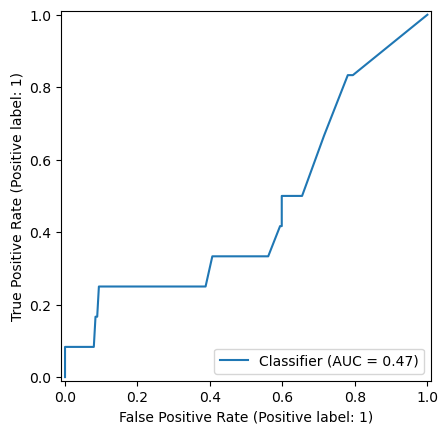

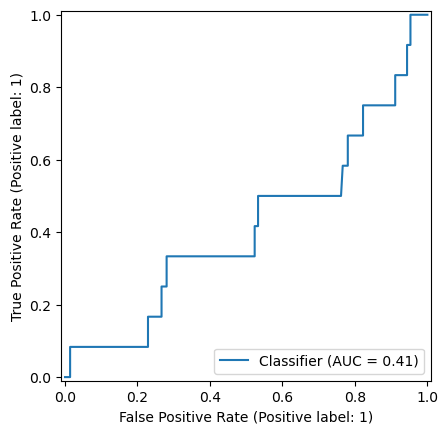

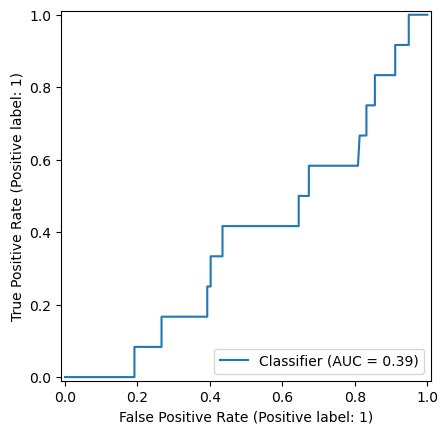

In [1864]:
models = {'Random Forest': RandomForestClassifier(class_weight ='balanced',random_state=42),'SVC':SVC(class_weight ='balanced'),'Logistic Regression':LogisticRegression(class_weight ='balanced',max_iter = 2000)} 

# Treinar e avaliar
hinselmann_results = train_and_evaluate_multi_models('Hinselmann', models)

hinselmann_results #é um dicionário que tem {nome: [df com as métricas, model instance], ...} para os três modelos 


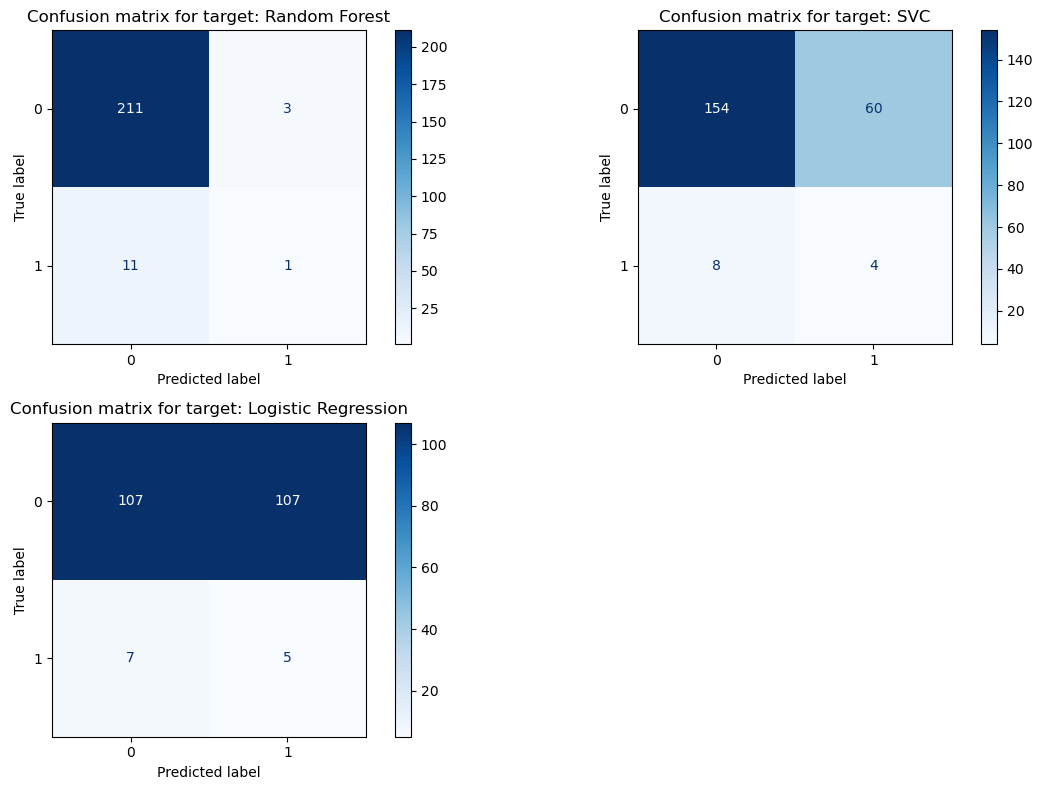

In [1865]:
confusion_matrix_visual('Hinselmann',hinselmann_results)

In [1868]:
#Inserir a Função que mostra a evolução da accuracy para cada modelo, para avaliar o overfitting


In [ ]:
param_grid = {
    'Random Forest': {
        'n_estimators': [100, 300, 500],              # Number of trees
        'max_depth': [10, 20, 30, None],              # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],              # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4],                # Minimum samples per leaf
        'class_weight': ['balanced', 'balanced_subsample'],  # Handle class imbalance
        'max_features': ['sqrt', 'log2', None]        # Number of features considered at each split
    },
    'SVC': {
        'C': [0.01, 0.1, 1, 10],                      # Regularization parameter
        'gamma': ['scale', 'auto', 0.01, 0.1, 1],     # Kernel coefficient
        'kernel': ['linear', 'rbf'],                  # Kernels for flexibility
        'class_weight': ['balanced']                  # Handle class imbalance
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],                      # Regularization strength
        'penalty': ['l1', 'l2', 'elasticnet'],        # Regularization types
        'solver': ['liblinear', 'saga'],              # Solvers supporting l1 or elasticnet
        'tol': [1e-4, 1e-3, 1e-2],                    # Convergence tolerance
        'max_iter': [100, 500, 1000],                 # Max iterations for convergence
        'class_weight': ['balanced']                  # Handle class imbalance
    }}

modelos = grid_search(hinselmann_results, param_grid,'Hinselmann')
display_metrics_and_plots(modelos, 'Hinselmann')
plot_hyperparameter_accuracies(modelos['Random Forest']['Grid Search F1 History'])
plot_hyperparameter_accuracies(modelos['SVC']['Grid Search F1 History'])
plot_hyperparameter_accuracies(modelos['Logistic Regression']['Grid Search F1 History'])


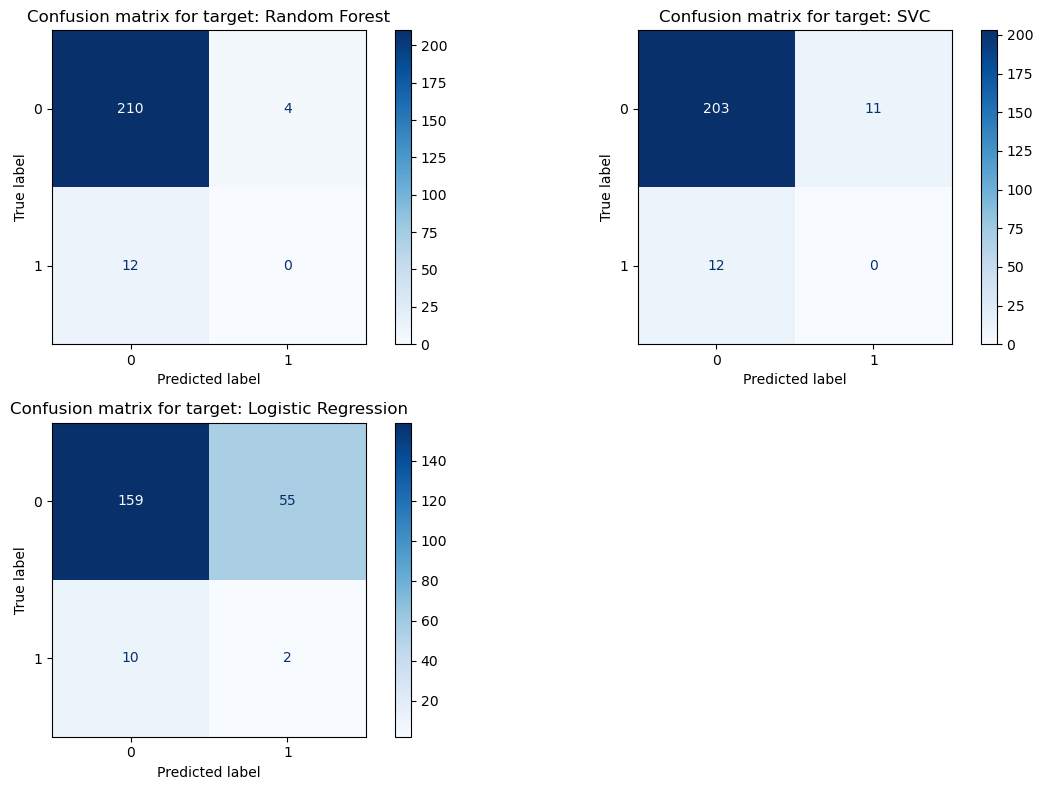

In [1872]:
#Plot de duas matrizes de confusão inicial e final para comparação 

confusion_matrix_visual('Hinselmann',modelos)

In [1874]:
#cross val
cross_validate_with_smote(hinselmann_results, X, Y, 'Hinselmann')


,Model,Target,Fold,Accuracy,F1-Score,Precision,Recall
0,Random Forest,Hinselmann,1,0.947020,0.927693,0.909139,0.947020
1,Random Forest,Hinselmann,2,0.933775,0.920983,0.908538,0.933775
2,Random Forest,Hinselmann,3,0.940397,0.924350,0.908840,0.940397
3,Random Forest,Hinselmann,4,0.940000,0.932130,0.925822,0.940000
4,Random Forest,Hinselmann,5,0.940000,0.923849,0.908243,0.940000
5,SVC,Hinselmann,1,0.582781,0.700753,0.902790,0.582781
6,SVC,Hinselmann,2,0.211921,0.294243,0.920565,0.211921
7,SVC,Hinselmann,3,0.291391,0.400723,0.931673,0.291391
8,SVC,Hinselmann,4,0.646667,0.748799,0.898227,0.646667
9,SVC,Hinselmann,5,0.366667,0.500997,0.886727,0.366667


<h4>3.2 - Schiller</h4>

{'Random Forest': {'metrics':       Model Name  Train Accuracy  Test Accuracy  Precision  Recall  \
  0  Random Forest        0.998956       0.876106   0.285714    0.08   
  
     Specificity  F1 Score  Area under ROC curve  
  0         0.08     0.125              0.555124  ,
  'instance': RandomForestClassifier(class_weight='balanced', random_state=42)},
 'SVC': {'metrics':   Model Name  Train Accuracy  Test Accuracy  Precision  Recall  Specificity  \
  0        SVC        0.806889       0.800885   0.045455    0.04         0.04   
  
     F1 Score  Area under ROC curve  
  0  0.042553              0.592537  ,
  'instance': SVC(class_weight='balanced')},
 'Logistic Regression': {'metrics':             Model Name  Train Accuracy  Test Accuracy  Precision  Recall  \
  0  Logistic Regression        0.629436       0.663717   0.081967     0.2   
  
     Specificity  F1 Score  Area under ROC curve  
  0          0.2  0.116279               0.40209  ,
  'instance': LogisticRegression(class_w

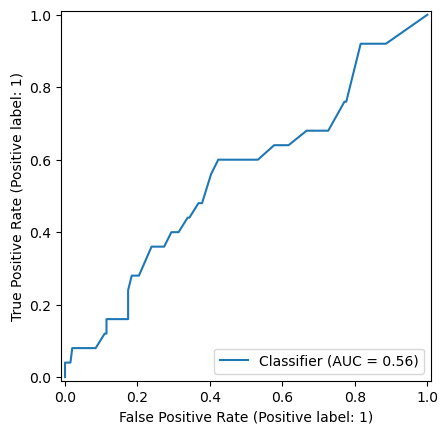

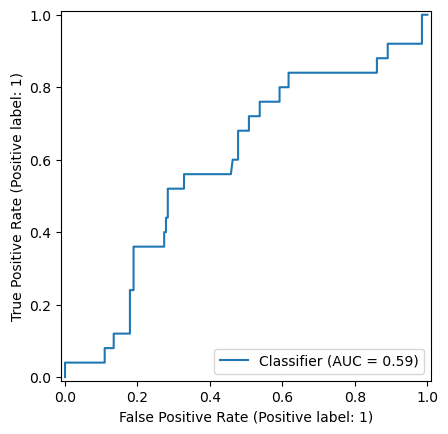

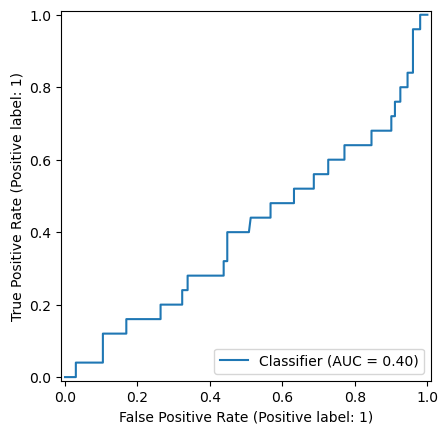

In [1674]:

# Treinar e avaliar
schiller_results = train_and_evaluate_multi_models('Schiller', models)

schiller_results #é um dicionário que tem {nome: [df com as métricas, model instance], ...} para os três modelos 

<h4>3.3 - Citology</h4>

{'Random Forest': {'metrics':       Model Name  Train Accuracy  Test Accuracy  Precision  Recall  \
  0  Random Forest        0.998996       0.933628        0.0     0.0   
  
     Specificity  F1 Score  Area under ROC curve  
  0          0.0       0.0              0.535241  ,
  'instance': RandomForestClassifier(class_weight='balanced', random_state=42)},
 'SVC': {'metrics':   Model Name  Train Accuracy  Test Accuracy  Precision  Recall  Specificity  \
  0        SVC        0.843373       0.902655        0.0     0.0          0.0   
  
     F1 Score  Area under ROC curve  
  0       0.0               0.52979  ,
  'instance': SVC(class_weight='balanced')},
 'Logistic Regression': {'metrics':             Model Name  Train Accuracy  Test Accuracy  Precision  Recall  \
  0  Logistic Regression        0.662651       0.650442   0.041096    0.25   
  
     Specificity  F1 Score  Area under ROC curve  
  0         0.25  0.070588              0.510709  ,
  'instance': LogisticRegression(class_w

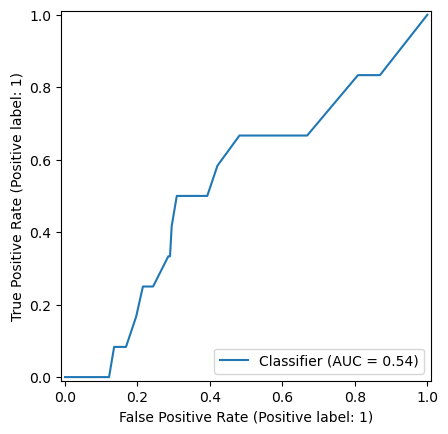

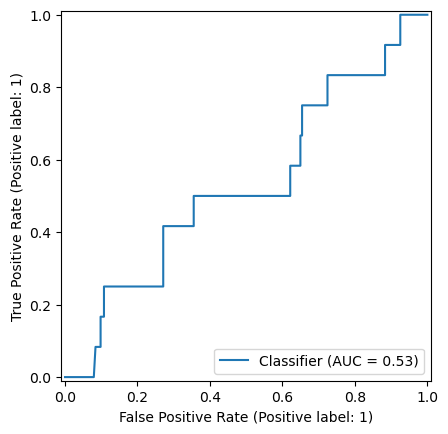

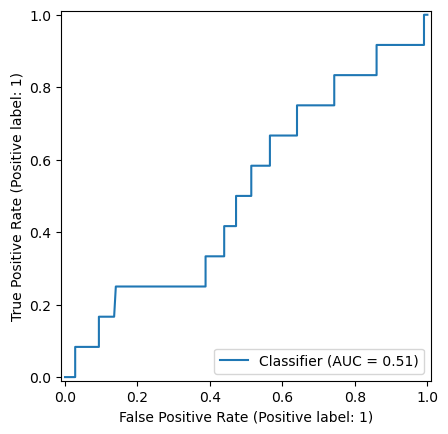

In [1676]:
# Treinar e avaliar
citology_results = train_and_evaluate_multi_models('Citology', models)

citology_results #é um dicionário que tem {nome: [df com as métricas, model instance], ...} para os três modelos 

<h4>3.4 - Biopsy </h4>

{'Random Forest': {'metrics':       Model Name  Train Accuracy  Test Accuracy  Precision    Recall  \
  0  Random Forest             1.0        0.89823       0.25  0.047619   
  
     Specificity  F1 Score  Area under ROC curve  
  0     0.047619      0.08              0.656446  ,
  'instance': RandomForestClassifier(class_weight='balanced', random_state=42)},
 'SVC': {'metrics':   Model Name  Train Accuracy  Test Accuracy  Precision    Recall  Specificity  \
  0        SVC        0.847475       0.867257   0.090909  0.047619     0.047619   
  
     F1 Score  Area under ROC curve  
  0    0.0625              0.556446  ,
  'instance': SVC(class_weight='balanced')},
 'Logistic Regression': {'metrics':             Model Name  Train Accuracy  Test Accuracy  Precision    Recall  \
  0  Logistic Regression        0.658586       0.690265   0.070175  0.190476   
  
     Specificity  F1 Score  Area under ROC curve  
  0     0.190476  0.102564              0.406156  ,
  'instance': LogisticRegres

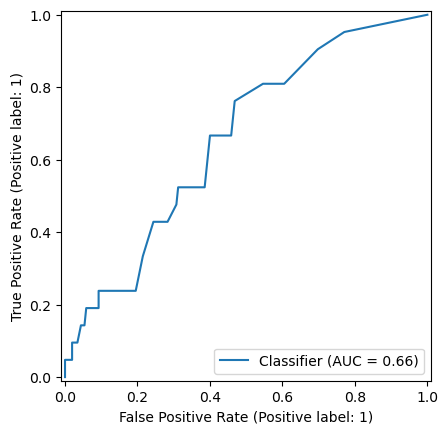

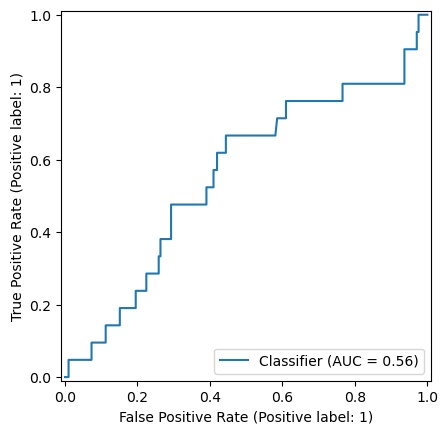

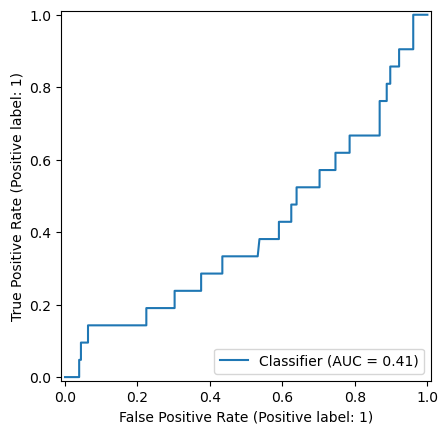

In [1821]:
# Treinar e avaliar
biopsy_results = train_and_evaluate_multi_models('Biopsy', models)

biopsy_results #é um dicionário que tem {nome: [df com as métricas, model instance], ...} para os três modelos 

 <h3>4. Result evaluation</h3>

In [ ]:
#discutir os resultados em si, avaliação de matrizes e merdas

 <h3>5. Discussion</h3>

<p>
    When working on machine learning projects, especially in the medical domain, various barriers and obstacles must be addressed to ensure the effectiveness and reliability of the models. In our case, we faced significant challenges related to data quality, imbalance, and the need for additional data acquisition. Below, we outline these challenges and the methods we employed to overcome them.
ph5>

<h4>Missing Values</h4>
<p>
    Medical datasets often contain missing values, inconsistencies, or irrelevant features, which can significantly hinder model performance. Our dataset was no exception, as it required extensive preprocessing to ensure that the data was clean, structured, and ready for analysis. This process included handling missing values, normalizing features, and selecting only the most relevant predictors for our models.
</p>

<h4>Data Imbalance</h4>
<p>
    A critical obstacle was the class imbalance inherent in medical datasets. Certain classes, particularly those representing the presence of cancer or positive tests, were underrepresented. This imbalance led to biased model predictions, where the classifier favored the majority class.
</p>
<p>
    To tackle this, we applied oversampling techniques such as <strong>Synthetic Minority Oversampling Technique (SMOTE)</strong>. By generating synthetic examples for the minority classes, we were able to balance the dataset, significantly improving the performance of our models. These techniques ensured that the models learned effectively from all classes, reducing bias and increasing generalizability.
</p>

<h4>Volume of Data</h4>
<p>
    While oversampling improved the balance of the dataset, the original data volume was still a limiting factor. Given the nature of medical data, acquiring additional samples can be challenging, as it often requires compliance with strict regulations and access to patient records.
</p>
<p>
    We designed and implemented a <strong>questionnaire</strong> aimed at collecting additional data. This questionnaire was carefully tailored to capture relevant medical and demographic information, adhering to ethical standards and data privacy laws. The responses from this questionnaire will be integrated into our dataset, expanding the sample size and diversity. This approach is expected to provide more robust training data for our models and improve their ability to generalize to new cases.
</p>


 <h3>6. Future Prespectives </h3>

<p>
    While our study focused on predicting risk factors and their associations with cervical cancer, 
    an intriguing avenue for future research would be to develop models aimed at 
    <strong>predicting the diagnosis of cervical cancer itself</strong>.
</p>
<p>
    This approach would shift the focus from risk factor analysis to direct diagnosis, enabling a more precise identification 
    of individuals who are likely to have cervical cancer. Such a study would require robust datasets that combine clinical, 
    demographic, and molecular data, along with advanced modeling techniques to ensure high sensitivity and specificity.
</p>
<p>
    Incorporating data from imaging modalities, genomic sequences, or proteomics could further enhance the predictive capability 
    of such models. Ultimately, this could lead to early diagnosis, timely interventions, and improved patient outcomes, making it 
    a valuable direction for future research in the field of medical data science.
</p>


 <h3>7.Appendix Section </h3>

In [1958]:
from IPython.display import HTML

html_code = """<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Medical Questionnaire</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 20px;
        }
        form {
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
            border: 1px solid #ddd;
            border-radius: 8px;
            background: #f9f9f9;
        }
        h2, h3 {
            text-align: center;
        }
        fieldset {
            margin-bottom: 20px;
            padding: 10px;
            border: 1px solid #ddd;
            border-radius: 8px;
        }
        legend {
            font-weight: bold;
        }
        label {
            display: block;
            margin-bottom: 5px;
        }
        input, select {
            width: 100%;
            padding: 8px;
            margin-bottom: 10px;
            border: 1px solid #ccc;
            border-radius: 4px;
        }
        button {
            display: block;
            width: 100%;
            padding: 10px;
            background-color: #007bff;
            color: #fff;
            border: none;
            border-radius: 4px;
            cursor: pointer;
        }
        button:hover {
            background-color: #0056b3;
        }
    </style>
</head>
<body>

    <form id="medical-questionnaire">
        <h2>Medical Questionnaire</h2>
        
        <fieldset>
            <legend>Demographics</legend>
            <label for="age">Age:</label>
            <input type="number" id="age" name="age" min="0" required>
            
            <label for="sexual-partners">Number of Sexual Partners:</label>
            <input type="number" id="sexual-partners" name="sexual-partners" min="0" step="1">
            
            <label for="first-intercourse">Age at First Sexual Intercourse:</label>
            <input type="number" id="first-intercourse" name="first-intercourse" min="0" step="1">
            
            <label for="pregnancies">Number of Pregnancies:</label>
            <input type="number" id="pregnancies" name="pregnancies" min="0" step="1">
        </fieldset>
        
        <fieldset>
            <legend>Smoking Habits</legend>
            <label for="smokes">Do you smoke?</label>
            <select id="smokes" name="smokes">
                <option value="1">Yes</option>
                <option value="0">No</option>
            </select>
            
            <label for="smoke-years">Years Smoking:</label>
            <input type="number" id="smoke-years" name="smoke-years" min="0" step="0.1">
            
            <label for="packs-year">Packs Per Year:</label>
            <input type="number" id="packs-year" name="packs-year" min="0" step="0.1">
        </fieldset>
        
        <fieldset>
            <legend>Contraceptives</legend>
            <label for="hormonal-contraceptives">Using Hormonal Contraceptives?</label>
            <select id="hormonal-contraceptives" name="hormonal-contraceptives">
                <option value="1">Yes</option>
                <option value="0">No</option>
            </select>
            
            <label for="contraceptives-years">Years Using Hormonal Contraceptives:</label>
            <input type="number" id="contraceptives-years" name="contraceptives-years" min="0" step="0.1">
            
            <label for="iud">Using an IUD?</label>
            <select id="iud" name="iud">
                <option value="1">Yes</option>
                <option value="0">No</option>
            </select>
            
            <label for="iud-years">Years Using an IUD:</label>
            <input type="number" id="iud-years" name="iud-years" min="0" step="1">
        </fieldset>
        
        <fieldset>
            <legend>Sexually Transmitted Diseases (STDs)</legend>
            <label for="stds">Have you been diagnosed with an STD?</label>
            <select id="stds" name="stds">
                <option value="1">Yes</option>
                <option value="0">No</option>
            </select>
            
            <label for="stds-number">Number of STDs Diagnosed:</label>
            <input type="number" id="stds-number" name="stds-number" min="0">
            
            <label for="time-since-first-diagnosis">Time Since First Diagnosis (years):</label>
            <input type="number" id="time-since-first-diagnosis" name="time-since-first-diagnosis" min="0" step="0.1">
            
            <label for="time-since-last-diagnosis">Time Since Last Diagnosis (years):</label>
            <input type="number" id="time-since-last-diagnosis" name="time-since-last-diagnosis" min="0" step="0.1">
        </fieldset>
        
        <fieldset>
            <legend>Diagnosis Results</legend>
            <label for="dx-cancer">Have you been diagnosed with cancer?</label>
            <select id="dx-cancer" name="dx-cancer">
                <option value="1">Yes</option>
                <option value="0">No</option>
            </select>
            
            <label for="dx-cin">Have you been diagnosed with CIN?</label>
            <select id="dx-cin" name="dx-cin">
                <option value="1">Yes</option>
                <option value="0">No</option>
            </select>
            
            <label for="dx-hpv">Have you been diagnosed with HPV?</label>
            <select id="dx-hpv" name="dx-hpv">
                <option value="1">Yes</option>
                <option value="0">No</option>
            </select>
        </fieldset>
        
        <button type="submit">Submit</button>
    </form>

</body>
</html>"""

HTML(html_code)
